In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/USER/Desktop/Bike Sharing/day (1).csv")

In [4]:
# Initial data exploration
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
data.shape

(730, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
data.isnull()

instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
725    False   False   False  False  False    False    False       False   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   

     weathersit   temp  atemp    hum  windspeed  casual  registered    cnt  
0         False  False  False  False      False   False       False  False  
1         False  False  False  False      False   False       False  False  
2         False  False  False  False      False   False       False  False  
3         False  False  False  False      False   False       False  False  
4         False  False  False  False      False   False       False  False  
..          ...    ...    ...    ...        ...     ...         ...    ...  
725       False  False  False  False      False   False       False  False  
726       False  False  False  False      False   False       False  False  
727       False  False  False  False      False   False       False  False  
728       False  False  False  False      False   False       False  False  
729       False  False  False  False      False   False       False  False  

[730 rows x 16 columns]

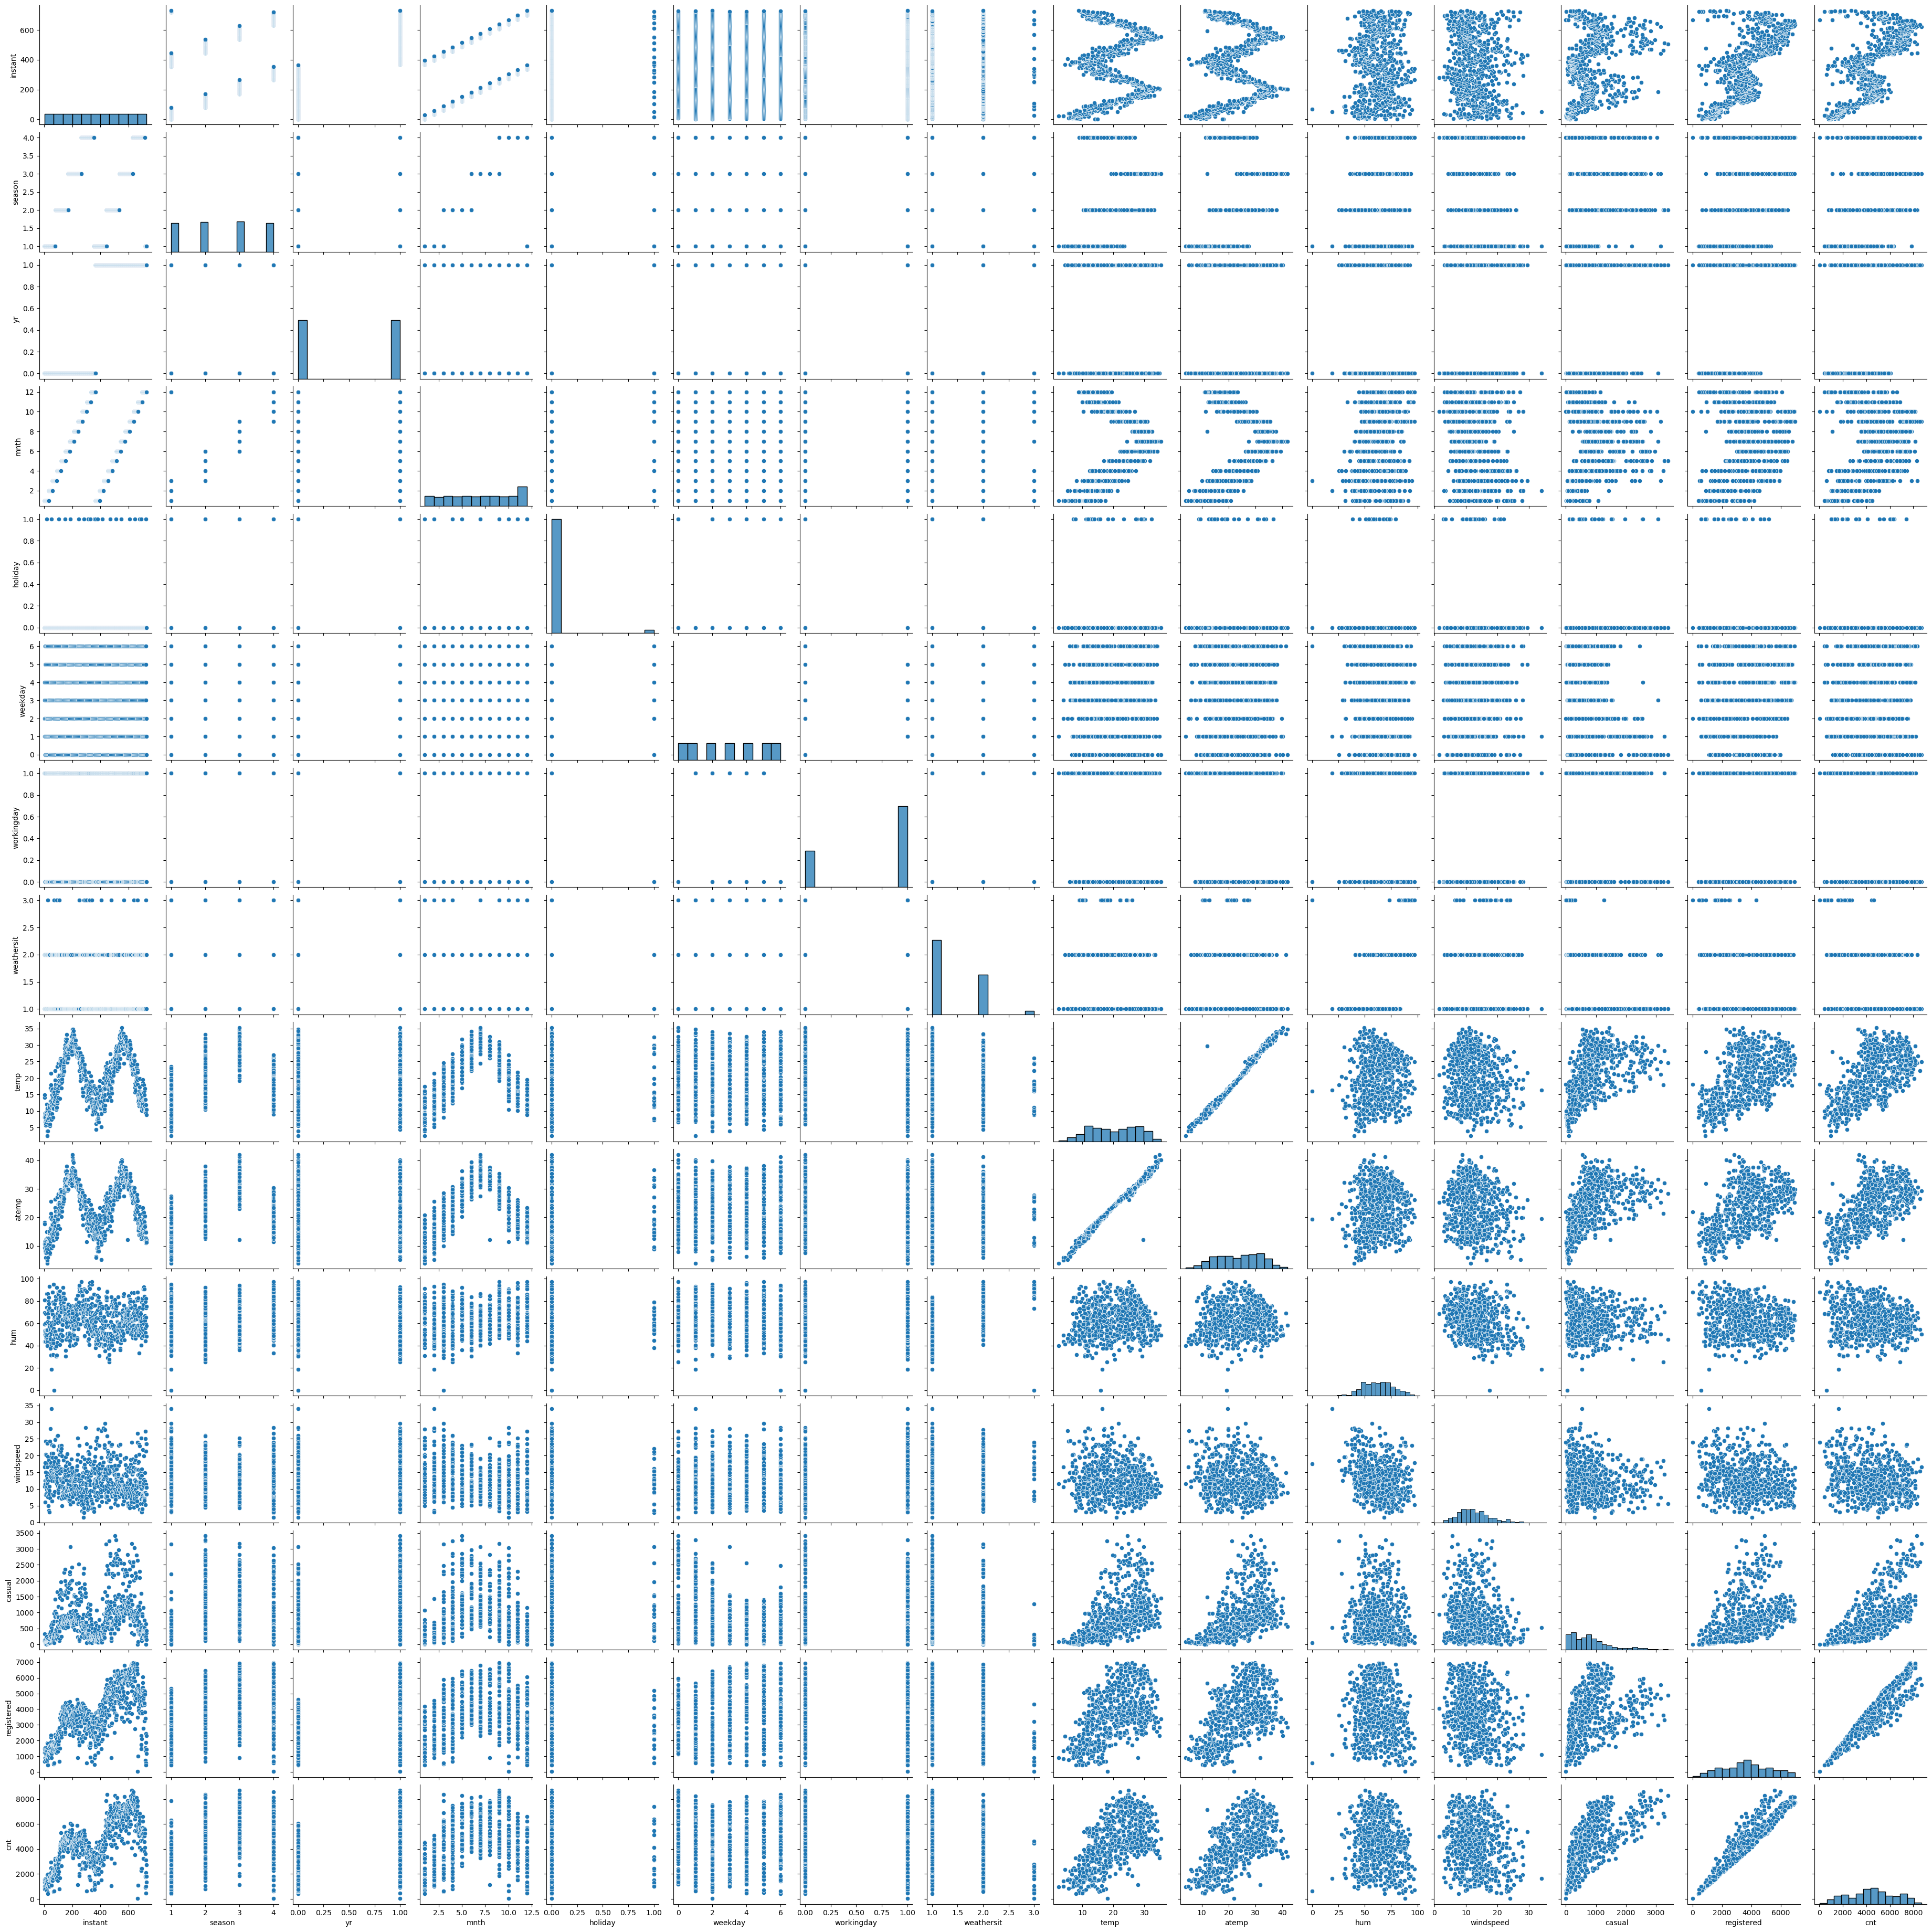

In [9]:
#Visualize the data
sns.pairplot(data)
plt.show()

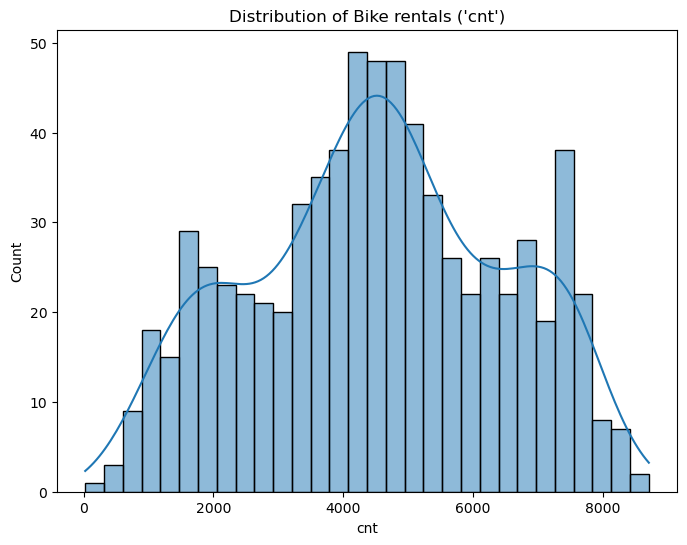

In [10]:
# Plot the distribution of target variable "cnt"
plt.figure(figsize=(8,6))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title("Distribution of Bike rentals ('cnt')")
plt.show()

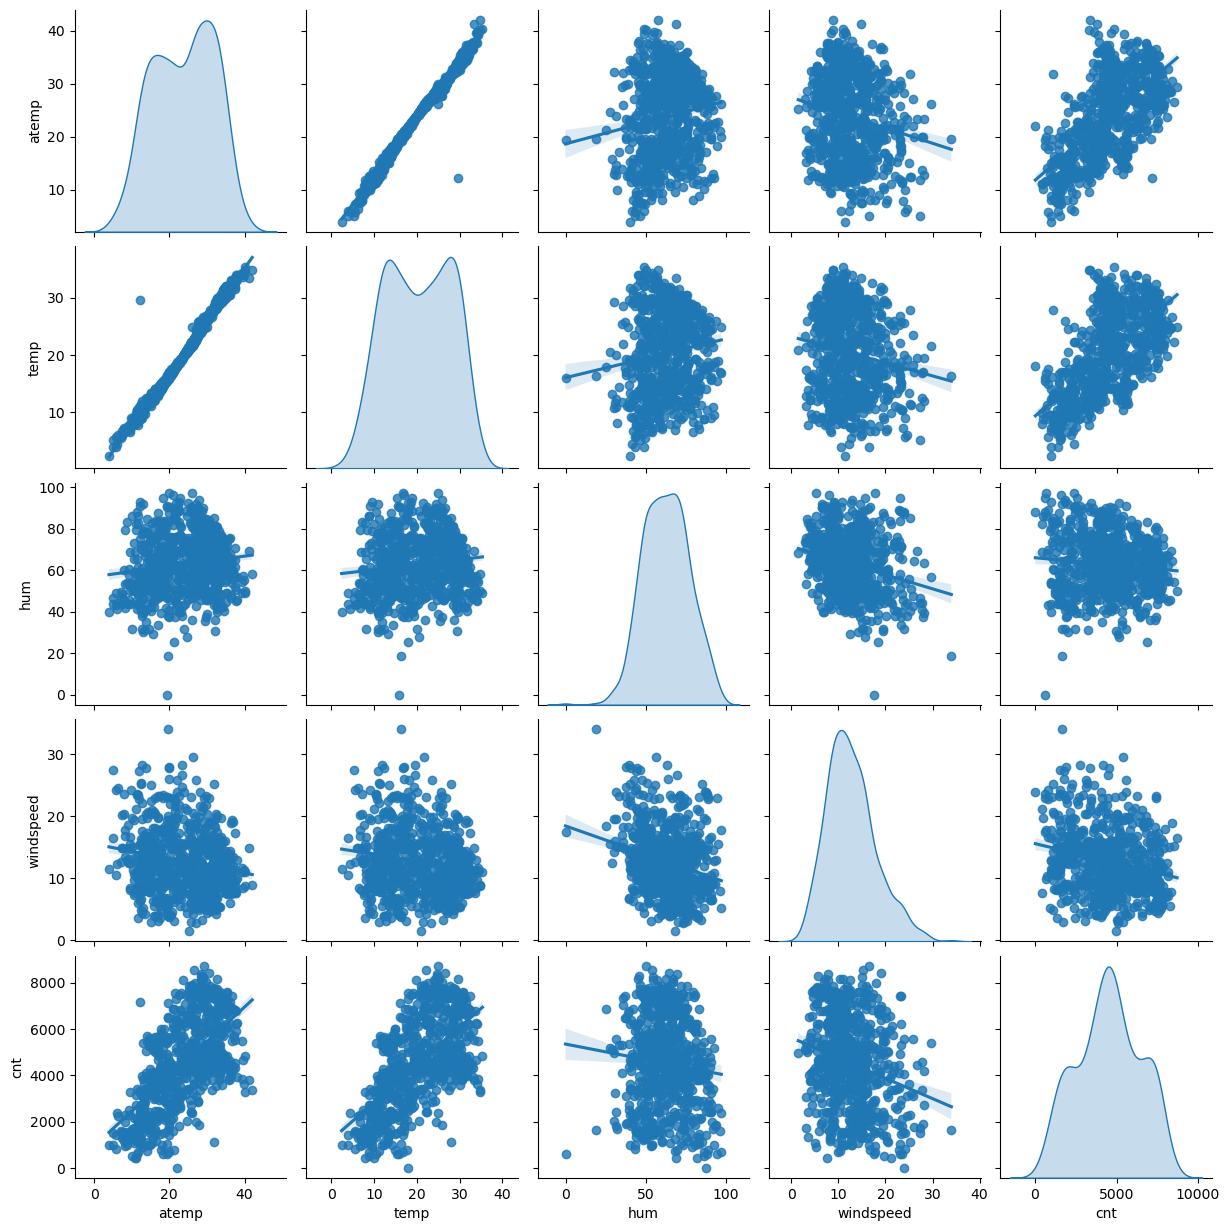

In [11]:
# Visualize relationship between numerical variables and "cnt"
sns.pairplot(data, vars=['atemp', 'temp', 'hum', 'windspeed', 'cnt'], kind='reg', diag_kind='kde')
plt.show()

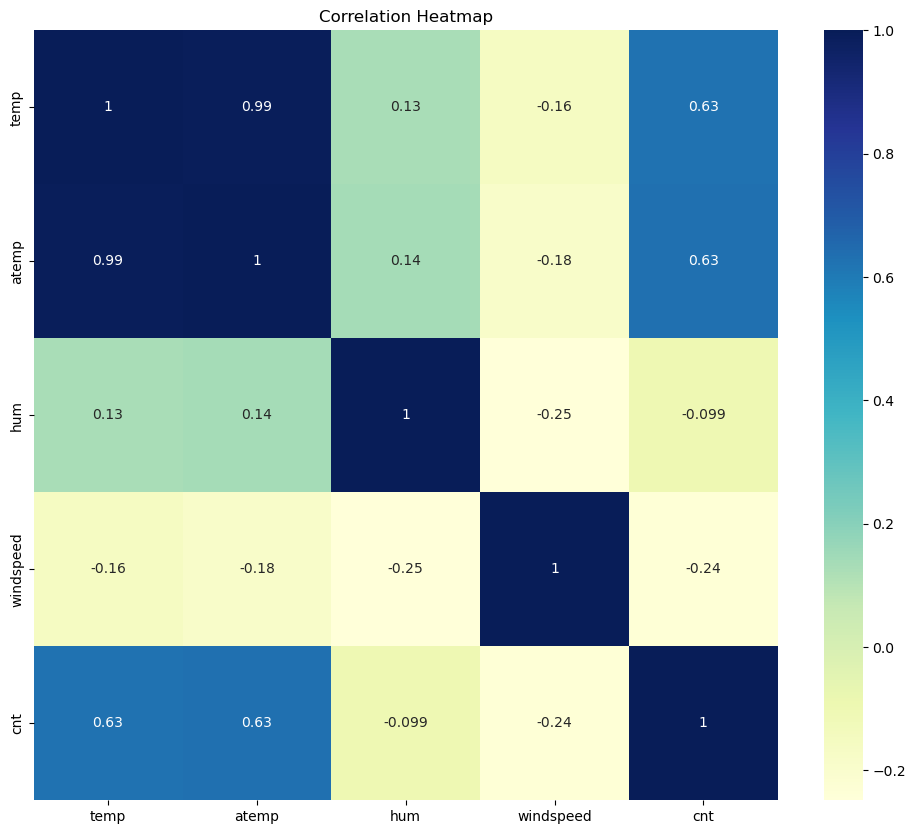

In [117]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [118]:
# Convert categorical-like numerical columns into categories
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 
                                     3: 'Fall', 4: 'Winter'})

data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 
                                             3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

data['weekday'] = data['weekday'].map({0: 'Wednesday', 1: 'Thursday', 2: 'Friday', 
                                       3: 'Saturday', 4: 'Sunday', 5: 'Monday', 6: 'Tuesday'})

data['mnth'] = data['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

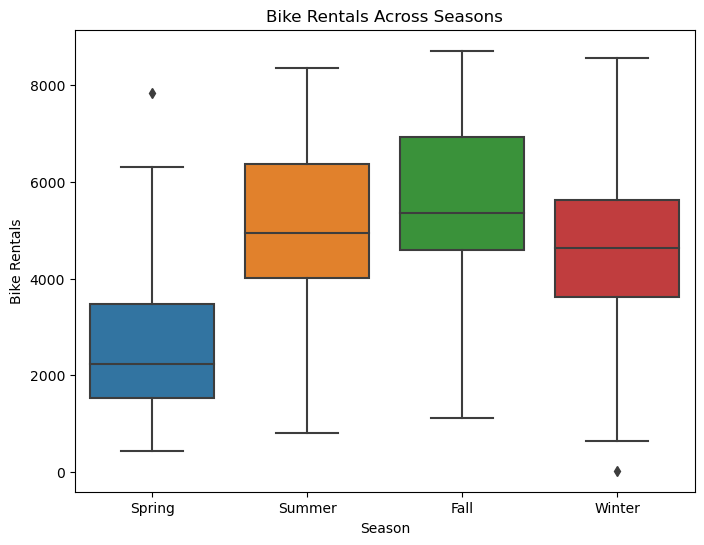

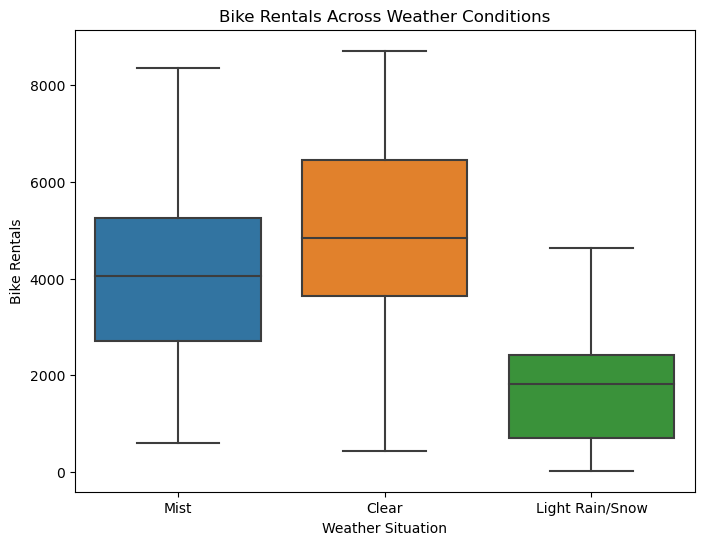

In [119]:
# Boxplot for 'season' vs 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title("Bike Rentals Across Seasons")
plt.xlabel("Season")
plt.ylabel("Bike Rentals")
plt.show()

# Boxplot for 'weathersit' vs 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title("Bike Rentals Across Weather Conditions")
plt.xlabel("Weather Situation")
plt.ylabel("Bike Rentals")
plt.show()

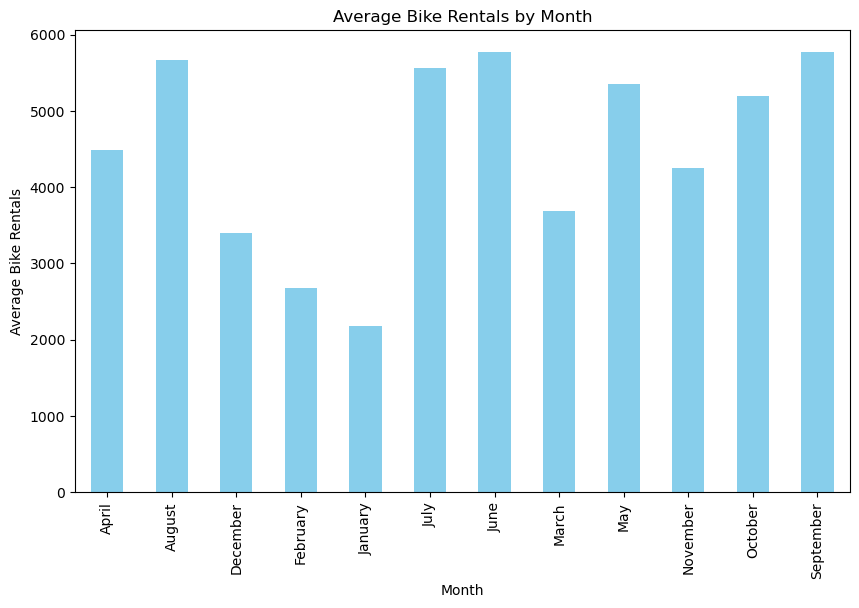

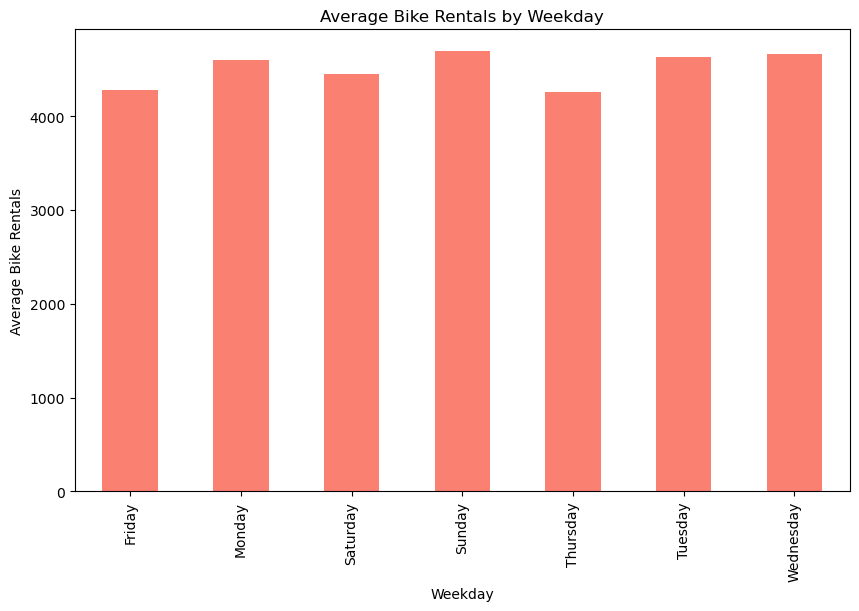

In [120]:
# Average bike rentals by month
monthly_trend = data.groupby('mnth')['cnt'].mean()
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='bar', color='skyblue')
plt.title("Average Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Bike Rentals")
plt.show()

# Average bike rentals by weekday
weekday_trend = data.groupby('weekday')['cnt'].mean()
plt.figure(figsize=(10, 6))
weekday_trend.plot(kind='bar', color='salmon')
plt.title("Average Bike Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Bike Rentals")
plt.show()

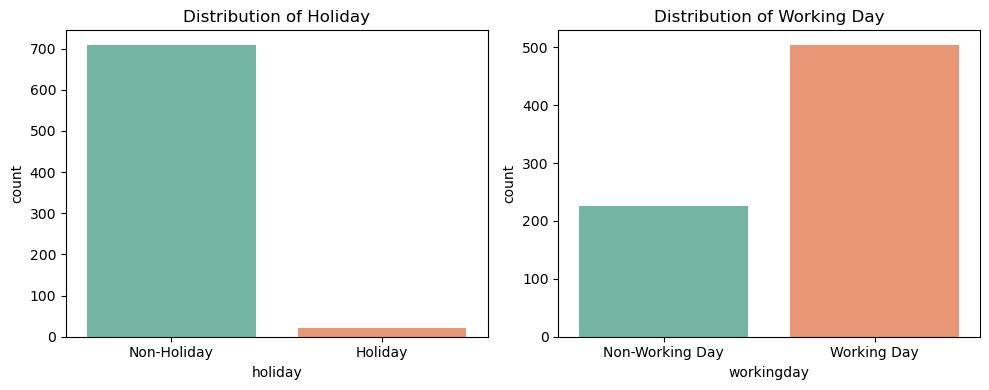

In [121]:
plt.figure(figsize=(10, 4))

# Holiday distribution
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='holiday', palette='Set2')
plt.title('Distribution of Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

# Working Day distribution
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='workingday', palette='Set2')
plt.title('Distribution of Working Day')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])

plt.tight_layout()
plt.show()

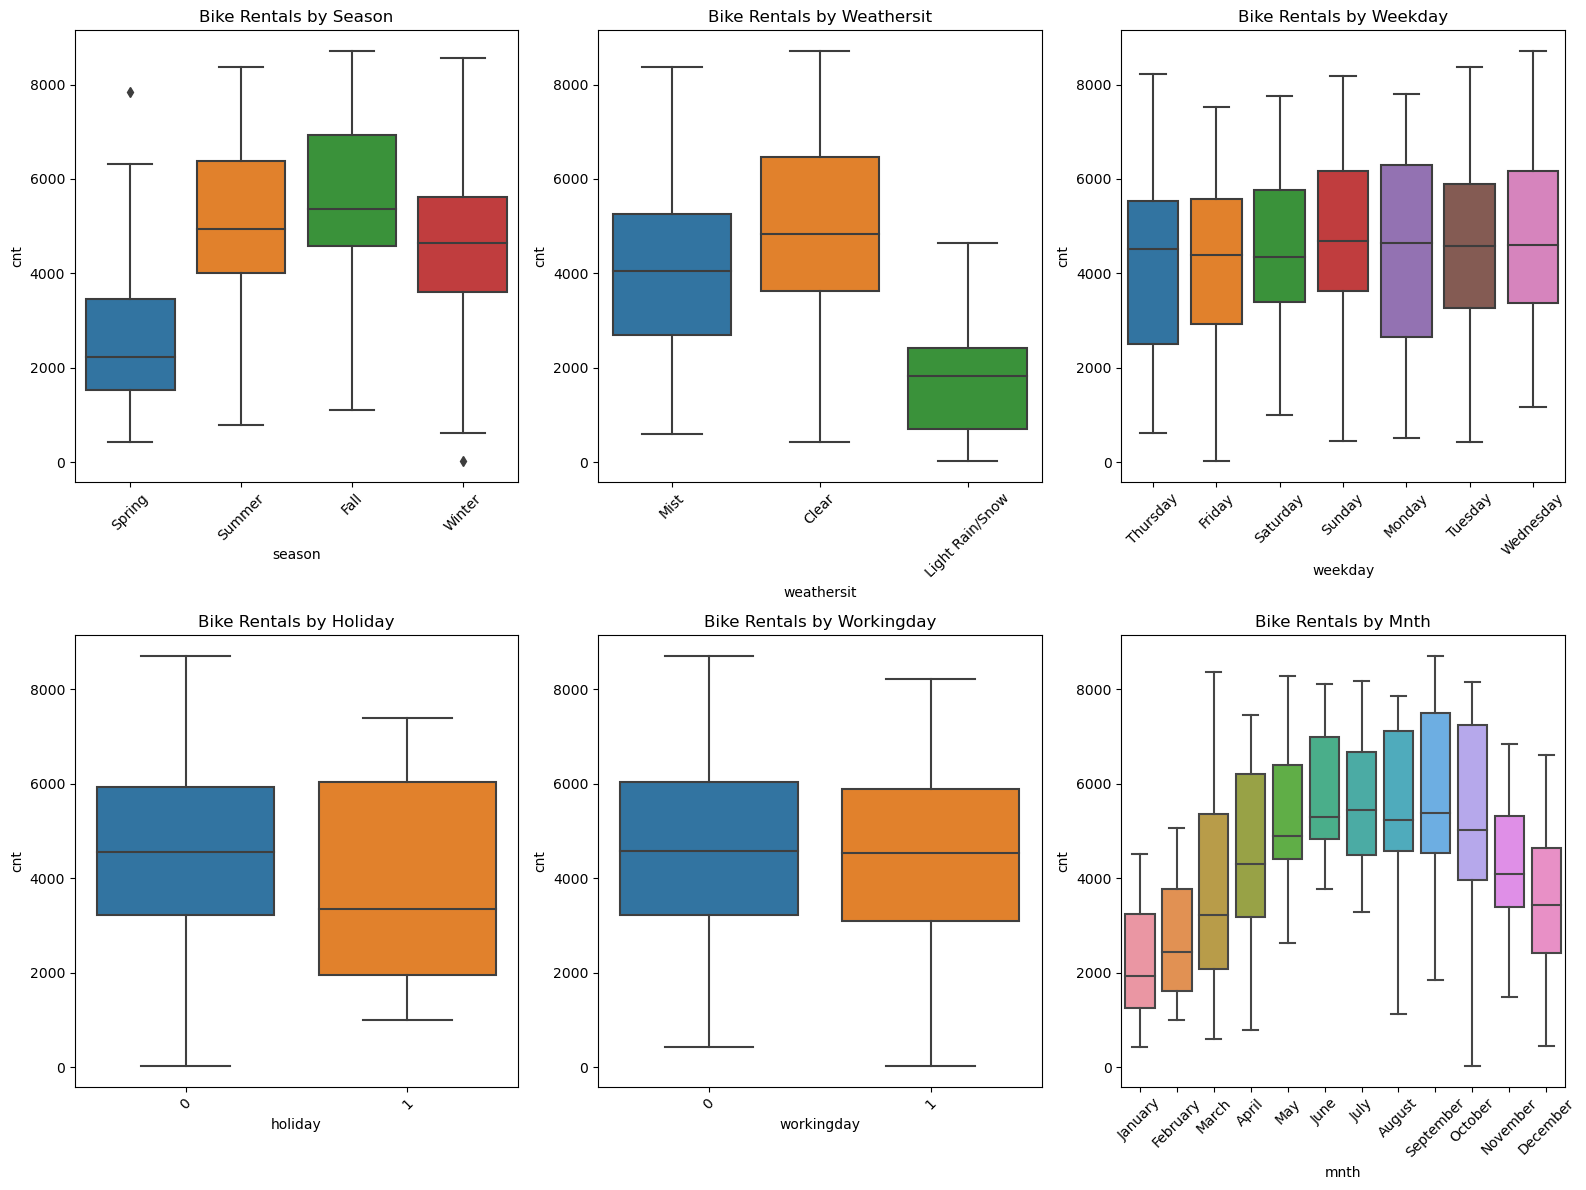

In [122]:
# List of categorical variables to plot against 'cnt'
categorical_vars = ['season', 'weathersit', 'weekday', 'holiday', 'workingday', 'mnth']

# Set up the plot with subplots
plt.figure(figsize=(16, 12))

# Loop through each categorical variable and create a subplot
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)  # Creates a 2x3 grid of subplots
    sns.boxplot(data=data, x=var, y='cnt')
    plt.title(f'Bike Rentals by {var.capitalize()}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [123]:
# Create dummy variables for categorical columns
data = pd.get_dummies(data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

In [124]:
# Drop irrelevant columns
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [125]:
# Split data into training and testing sets
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)

In [126]:
# Scale numerical variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [127]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [128]:
# VIF Calculation Function
def calculate_vif(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif.sort_values(by='VIF', ascending=False)

In [129]:
# Prepare data for regression
y_train = df_train.pop('cnt')
x_train = df_train

In [130]:
# Add constant to the model
x_train_sm = sm.add_constant(x_train)

In [131]:
# Initial model
model = sm.OLS(y_train, x_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.24e-177
Time:                        18:59:54   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [132]:
# Calculate VIF
vif = calculate_vif(x_train)
vif

Features         VIF
3                         temp  441.784586
4                        atemp  382.195834
2                   workingday   64.638951
5                          hum   41.100810
7                season_Spring   13.500917
9                season_Winter   12.398106
28           weekday_Wednesday   12.279002
27             weekday_Tuesday   11.781197
8                season_Summer    9.850451
20               mnth_November    7.177348
12                 mnth_August    6.915013
21                mnth_October    6.827124
15                mnth_January    6.106368
16                   mnth_July    5.930868
6                    windspeed    5.859787
13               mnth_December    5.802764
22              mnth_September    5.045176
14               mnth_February    4.499978
18                  mnth_March    3.730040
17                   mnth_June    3.092901
1                      holiday    2.798763
19                    mnth_May    2.452964
11             weathersit_Mist    2.432333
0                           yr    2.136357
26            weekday_Thursday    2.047664
23              weekday_Monday    2.017628
25              weekday_Sunday    1.977234
24            weekday_Saturday    1.907778
10  weathersit_Light Rain/Snow    1.335068

In [133]:
# # Iteratively drop features with high VIF or low significance
# features_to_drop = ['atemp', 'season_Spring', 'season_Winter','hum', 'workingday', 'mnth_July', 'mnth_June', 
#                     'mnth_March', 'weekday_Thursday', 'mnth_May', 'weekday_Saturday', 'weekday_Monday', 
#                     'mnth_February', 'weekday_Sunday', 'weekday_Tuesday']

In [134]:
# Drop 'atemp' due to high multicollinearity risk
x_train.drop(['atemp'], axis=1, inplace=True)

In [135]:
x_train_sm = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.34e-178
Time:                        18:59:54   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3651      0.085      4.296      0.000       0.198       0.532
yr                             0.2311      0.008     28.384      0.000       0.215       0.247
holiday                       -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday                    -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp                           0.4405      0.047      9.412      0.000       0.349       0.532
hum                           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed                     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_Spring                 -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_Summer                  0.0464      0.026      1.761      0.079      -0.005       0.098
season_Winter                  0.1126      0.028      3.994      0.000       0.057       0.168
weathersit_Light Rain/Snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
weathersit_Mist               -0.0578      0.011     -5.495      0.000      -0.079      -0.037
mnth_August                    0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_December                 -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_February                 -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_January                  -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_July                     -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_June                      0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_March                     0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                       0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_November                 -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_October                   0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_September                 0.0908      0.032      2.822      0.005       0.028       0.154
weekday_Monday                 0.0261      0.015      1.774      0.077      -0.003       0.055
weekday_Saturday               0.0158      0.015      1.056      0.291      -0.014       0.045
weekday_Sunday                 0.0303      0.015      2.055      0.040       0.001       0.059
weekday_Thursday               0.0015      0.014      0.101      0.920      -0.027       0.030
weekday_Tuesday               -0.0296      0.071     -0.415      0.678      -0.170       0.111
weekday_Wednesday             -0.0234      0.071     -0.328      0.743      -0.163       0.117
===========================================

In [136]:
x_train.drop(['workingday'], axis=1, inplace=True)

x_train_sm = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.1
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.88e-179
Time:                        18:59:54   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     482   BIC:                            -870.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3043      0.045      6.758      0.000       0.216       0.393
yr                             0.2315      0.008     28.493      0.000       0.216       0.248
holiday                       -0.0842      0.026     -3.202      0.001      -0.136      -0.033
temp                           0.4421      0.047      9.455      0.000       0.350       0.534
hum                           -0.1565      0.039     -4.025      0.000      -0.233      -0.080
windspeed                     -0.1831      0.026     -7.034      0.000      -0.234      -0.132
season_Spring                 -0.0401      0.030     -1.326      0.185      -0.100       0.019
season_Summer                  0.0466      0.026      1.766      0.078      -0.005       0.098
season_Winter                  0.1119      0.028      3.971      0.000       0.057       0.167
weathersit_Light Rain/Snow    -0.2498      0.027     -9.378      0.000      -0.302      -0.197
weathersit_Mist               -0.0577      0.011     -5.482      0.000      -0.078      -0.037
mnth_August                    0.0266      0.034      0.785      0.433      -0.040       0.093
mnth_December                 -0.0437      0.034     -1.288      0.198      -0.110       0.023
mnth_February                 -0.0369      0.033     -1.109      0.268      -0.102       0.029
mnth_January                  -0.0638      0.034     -1.884      0.060      -0.130       0.003
mnth_July                     -0.0292      0.035     -0.827      0.409      -0.098       0.040
mnth_June                      0.0077      0.025      0.309      0.757      -0.041       0.057
mnth_March                     0.0007      0.025      0.027      0.979      -0.048       0.049
mnth_May                       0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_November                 -0.0408      0.037     -1.111      0.267      -0.113       0.031
mnth_October                   0.0062      0.036      0.172      0.864      -0.065       0.077
mnth_September                 0.0909      0.032      2.824      0.005       0.028       0.154
weekday_Monday                 0.0258      0.015      1.758      0.079      -0.003       0.055
weekday_Saturday               0.0164      0.015      1.094      0.274      -0.013       0.046
weekday_Sunday                 0.0299      0.015      2.030      0.043       0.001       0.059
weekday_Thursday               0.0011      0.014      0.078      0.938      -0.027       0.029
weekday_Tuesday                0.0292      0.015      1.932      0.054      -0.000       0.059
weekday_Wednesday              0.0354      0.015      2.383      0.018       0.006       0.065
==============================================================================
Omnibus:                       77.558   Durbin-Watson:     

In [137]:
calculate_vif(x_train)

Features        VIF
2                         temp  37.459533
3                          hum  37.352206
5                season_Spring  11.813484
7                season_Winter  11.602573
6                season_Summer   6.958412
19                mnth_October   6.344940
18               mnth_November   6.171312
10                 mnth_August   5.898861
13                mnth_January   5.274549
14                   mnth_July   5.229167
4                    windspeed   5.072354
11               mnth_December   5.019833
20              mnth_September   4.281329
12               mnth_February   4.021762
16                  mnth_March   3.387603
15                   mnth_June   2.939408
17                    mnth_May   2.426473
9              weathersit_Mist   2.383560
0                           yr   2.133210
24            weekday_Thursday   1.979118
21              weekday_Monday   1.966265
23              weekday_Sunday   1.916914
22            weekday_Saturday   1.870018
26           weekday_Wednesday   1.865991
25             weekday_Tuesday   1.833866
8   weathersit_Light Rain/Snow   1.313405
1                      holiday   1.125531

In [138]:
x_train.drop(['hum'], axis=1, inplace=True)

x_train_sm = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.94e-177
Time:                        18:59:54   Log-Likelihood:                 514.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     483   BIC:                            -860.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2387      0.043      5.600      0.000       0.155       0.323
yr                             0.2354      0.008     28.714      0.000       0.219       0.251
holiday                       -0.0827      0.027     -3.098      0.002      -0.135      -0.030
temp                           0.3907      0.046      8.553      0.000       0.301       0.480
windspeed                     -0.1546      0.025     -6.075      0.000      -0.205      -0.105
season_Spring                 -0.0445      0.031     -1.450      0.148      -0.105       0.016
season_Summer                  0.0374      0.027      1.400      0.162      -0.015       0.090
season_Winter                  0.1080      0.029      3.778      0.000       0.052       0.164
weathersit_Light Rain/Snow    -0.2921      0.025    -11.754      0.000      -0.341      -0.243
weathersit_Mist               -0.0819      0.009     -9.344      0.000      -0.099      -0.065
mnth_August                    0.0234      0.034      0.681      0.496      -0.044       0.091
mnth_December                 -0.0664      0.034     -1.955      0.051      -0.133       0.000
mnth_February                 -0.0506      0.034     -1.504      0.133      -0.117       0.015
mnth_January                  -0.0833      0.034     -2.445      0.015      -0.150      -0.016
mnth_July                     -0.0253      0.036     -0.706      0.480      -0.096       0.045
mnth_June                      0.0157      0.025      0.622      0.534      -0.034       0.065
mnth_March                    -0.0073      0.025     -0.289      0.773      -0.057       0.042
mnth_May                       0.0170      0.021      0.793      0.428      -0.025       0.059
mnth_November                 -0.0580      0.037     -1.568      0.118      -0.131       0.015
mnth_October                  -0.0118      0.036     -0.323      0.747      -0.083       0.060
mnth_September                 0.0789      0.033      2.424      0.016       0.015       0.143
weekday_Monday                 0.0281      0.015      1.885      0.060      -0.001       0.057
weekday_Saturday               0.0193      0.015      1.267      0.206      -0.011       0.049
weekday_Sunday                 0.0342      0.015      2.295      0.022       0.005       0.064
weekday_Thursday               0.0042      0.015      0.285      0.776      -0.025       0.033
weekday_Tuesday                0.0348      0.015      2.273      0.023       0.005       0.065
weekday_Wednesday              0.0412      0.015      2.739      0.006       0.012       0.071
==============================================================================
Omnibus:                       78.762   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.

In [139]:
calculate_vif(x_train)

Features        VIF
2                         temp  26.928890
6                season_Winter  11.349835
4                season_Spring  11.257347
18                mnth_October   5.880248
5                season_Summer   5.779643
9                  mnth_August   5.666601
17               mnth_November   5.571848
13                   mnth_July   5.147511
3                    windspeed   4.920488
12                mnth_January   4.612398
10               mnth_December   4.273988
19              mnth_September   3.891957
11               mnth_February   3.704299
15                  mnth_March   3.202288
14                   mnth_June   2.939032
16                    mnth_May   2.404127
0                           yr   2.112428
23            weekday_Thursday   1.978235
20              weekday_Monday   1.964873
22              weekday_Sunday   1.916837
21            weekday_Saturday   1.868942
25           weekday_Wednesday   1.864620
24             weekday_Tuesday   1.832319
8              weathersit_Mist   1.634951
7   weathersit_Light Rain/Snow   1.125267
1                      holiday   1.125097

In [140]:
x_train.drop(['season_Spring', 'season_Winter'], axis=1, inplace=True)

x_train_sm = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     101.1
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.27e-171
Time:                        18:59:55   Log-Likelihood:                 495.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     485   BIC:                            -836.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2210      0.039      5.634      0.000       0.144       0.298
yr                             0.2372      0.008     28.020      0.000       0.221       0.254
holiday                       -0.0964      0.028     -3.507      0.000      -0.150      -0.042
temp                           0.3949      0.047      8.420      0.000       0.303       0.487
windspeed                     -0.1724      0.026     -6.606      0.000      -0.224      -0.121
season_Summer                  0.0620      0.021      2.968      0.003       0.021       0.103
weathersit_Light Rain/Snow    -0.2889      0.026    -11.257      0.000      -0.339      -0.238
weathersit_Mist               -0.0808      0.009     -8.912      0.000      -0.099      -0.063
mnth_August                    0.0439      0.032      1.382      0.168      -0.019       0.106
mnth_December                  0.0189      0.031      0.610      0.542      -0.042       0.080
mnth_February                 -0.0694      0.032     -2.141      0.033      -0.133      -0.006
mnth_January                  -0.1031      0.033     -3.124      0.002      -0.168      -0.038
mnth_July                     -0.0051      0.034     -0.151      0.880      -0.071       0.061
mnth_June                      0.0215      0.026      0.834      0.404      -0.029       0.072
mnth_March                    -0.0202      0.025     -0.822      0.411      -0.068       0.028
mnth_May                       0.0139      0.022      0.628      0.531      -0.030       0.058
mnth_November                  0.0746      0.030      2.469      0.014       0.015       0.134
mnth_October                   0.1185      0.030      3.988      0.000       0.060       0.177
mnth_September                 0.1238      0.031      4.015      0.000       0.063       0.184
weekday_Monday                 0.0234      0.015      1.523      0.129      -0.007       0.054
weekday_Saturday               0.0187      0.016      1.188      0.236      -0.012       0.050
weekday_Sunday                 0.0322      0.015      2.090      0.037       0.002       0.063
weekday_Thursday              -0.0005      0.015     -0.032      0.975      -0.030       0.029
weekday_Tuesday                0.0298      0.016      1.887      0.060      -0.001       0.061
weekday_Wednesday              0.0390      0.016      2.507      0.012       0.008       0.069
==============================================================================
Omnibus:                       72.380   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.691
Skew:                          -0.772   Prob(JB):                     5.72e-35
Kurtosis:                       5.244   Cond. No.                         30.0
============================

In [141]:
calculate_vif(x_train)

Features        VIF
2                         temp  25.448700
7                  mnth_August   5.121465
11                   mnth_July   4.689323
3                    windspeed   4.636389
4                season_Summer   4.177787
17              mnth_September   3.619585
12                   mnth_June   2.901070
16                mnth_October   2.745137
14                    mnth_May   2.385654
15               mnth_November   2.194915
0                           yr   2.104222
8                mnth_December   1.970898
18              weekday_Monday   1.949650
13                  mnth_March   1.947597
21            weekday_Thursday   1.940835
20              weekday_Sunday   1.910746
10                mnth_January   1.862143
19            weekday_Saturday   1.856593
23           weekday_Wednesday   1.856194
22             weekday_Tuesday   1.811502
9                mnth_February   1.778680
6              weathersit_Mist   1.633161
5   weathersit_Light Rain/Snow   1.122033
1                      holiday   1.116677

In [142]:
x_train.drop(['mnth_August', 'mnth_December', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May' ], axis=1, inplace=True)

x_train_sm = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train_sm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     132.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.22e-175
Time:                        18:59:55   Log-Likelihood:                 489.94
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     491   BIC:                            -861.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2164      0.023      9.471      0.000       0.172       0.261
yr                             0.2367      0.008     28.020      0.000       0.220       0.253
holiday                       -0.0968      0.028     -3.513      0.000      -0.151      -0.043
temp                           0.4250      0.025     17.096      0.000       0.376       0.474
windspeed                     -0.1823      0.026     -7.082      0.000      -0.233      -0.132
season_Summer                  0.0563      0.011      5.024      0.000       0.034       0.078
weathersit_Light Rain/Snow    -0.2918      0.026    -11.326      0.000      -0.342      -0.241
weathersit_Mist               -0.0785      0.009     -8.689      0.000      -0.096      -0.061
mnth_February                 -0.0715      0.020     -3.621      0.000      -0.110      -0.033
mnth_January                  -0.1045      0.019     -5.533      0.000      -0.142      -0.067
mnth_November                  0.0684      0.017      3.984      0.000       0.035       0.102
mnth_October                   0.1082      0.017      6.544      0.000       0.076       0.141
mnth_September                 0.1076      0.017      6.486      0.000       0.075       0.140
weekday_Monday                 0.0262      0.015      1.704      0.089      -0.004       0.056
weekday_Saturday               0.0220      0.016      1.397      0.163      -0.009       0.053
weekday_Sunday                 0.0325      0.015      2.104      0.036       0.002       0.063
weekday_Thursday               0.0026      0.015      0.174      0.862      -0.027       0.032
weekday_Tuesday                0.0316      0.016      1.993      0.047       0.000       0.063
weekday_Wednesday              0.0401      0.016      2.565      0.011       0.009       0.071
==============================================================================
Omnibus:                       67.658   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.786
Skew:                          -0.780   Prob(JB):                     2.94e-28
Kurtosis:                       4.880   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
calculate_vif(x_train)

Features       VIF
2                         temp  5.547197
3                    windspeed  3.982215
0                           yr  2.044721
14              weekday_Sunday  1.766334
15            weekday_Thursday  1.757870
12              weekday_Monday  1.742076
4                season_Summer  1.699981
17           weekday_Wednesday  1.693595
13            weekday_Saturday  1.687751
16             weekday_Tuesday  1.663743
6              weathersit_Mist  1.559068
8                 mnth_January  1.368334
7                mnth_February  1.276525
11              mnth_September  1.258431
9                mnth_November  1.252159
10                mnth_October  1.238081
5   weathersit_Light Rain/Snow  1.117634
1                      holiday  1.108975

In [144]:
x_train.drop(['weekday_Saturday', 'weekday_Thursday', 'weekday_Saturday'], axis=1, inplace=True)

x_train_sm = sm.add_constant(x_train)
final_model = sm.OLS(y_train, x_train_sm).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     149.0
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.55e-177
Time:                        18:59:55   Log-Likelihood:                 488.77
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     493   BIC:                            -871.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2247      0.021     10.830      0.000       0.184       0.265
yr                             0.2369      0.008     28.055      0.000       0.220       0.253
holiday                       -0.0904      0.027     -3.330      0.001      -0.144      -0.037
temp                           0.4244      0.025     17.076      0.000       0.376       0.473
windspeed                     -0.1853      0.026     -7.221      0.000      -0.236      -0.135
season_Summer                  0.0567      0.011      5.064      0.000       0.035       0.079
weathersit_Light Rain/Snow    -0.2907      0.026    -11.293      0.000      -0.341      -0.240
weathersit_Mist               -0.0781      0.009     -8.650      0.000      -0.096      -0.060
mnth_February                 -0.0713      0.020     -3.613      0.000      -0.110      -0.033
mnth_January                  -0.1040      0.019     -5.507      0.000      -0.141      -0.067
mnth_November                  0.0678      0.017      3.951      0.000       0.034       0.101
mnth_October                   0.1086      0.017      6.566      0.000       0.076       0.141
mnth_September                 0.1075      0.017      6.475      0.000       0.075       0.140
weekday_Monday                 0.0188      0.013      1.479      0.140      -0.006       0.044
weekday_Sunday                 0.0252      0.013      1.958      0.051   -8.47e-05       0.051
weekday_Tuesday                0.0241      0.013      1.818      0.070      -0.002       0.050
weekday_Wednesday              0.0326      0.013      2.506      0.013       0.007       0.058
==============================================================================
Omnibus:                       67.869   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.169
Skew:                          -0.788   Prob(JB):                     6.61e-28
Kurtosis:                       4.845   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
calculate_vif(x_train)

Features       VIF
2                         temp  4.431275
3                    windspeed  3.823034
0                           yr  2.040516
4                season_Summer  1.683325
6              weathersit_Mist  1.545917
13              weekday_Sunday  1.342059
12              weekday_Monday  1.322490
15           weekday_Wednesday  1.302217
14             weekday_Tuesday  1.283592
8                 mnth_January  1.269381
11              mnth_September  1.257767
7                mnth_February  1.245303
9                mnth_November  1.223744
10                mnth_October  1.222661
5   weathersit_Light Rain/Snow  1.113972
1                      holiday  1.073501

In [146]:
x_train_sm = x_train_sm[final_model.params.index]  

In [147]:
# Residual Analysis
y_train_pred = final_model.predict(x_train_sm)

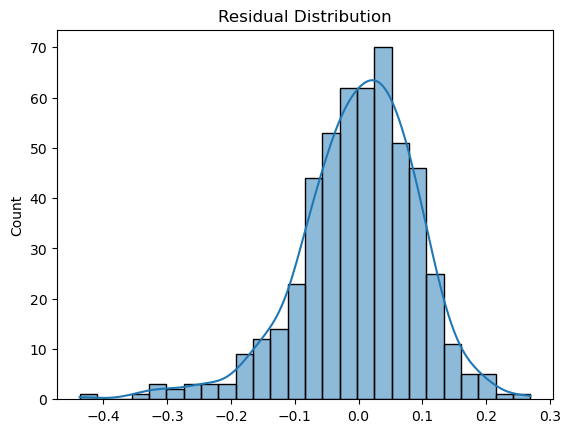

In [148]:
# Residuals
residuals = y_train - y_train_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

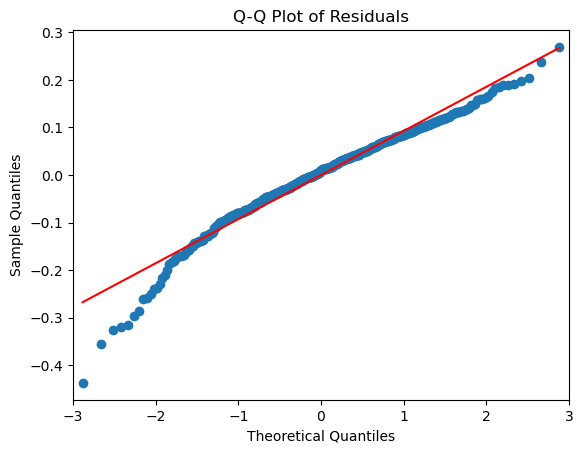

In [149]:
# Q-Q plot
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [150]:
# Prepare test data
y_test = df_test.pop('cnt')
x_test = df_test

In [151]:
# Add constant to test data
x_test_sm = sm.add_constant(x_test)

In [152]:
model = sm.OLS(y_train, x_train_sm).fit()

In [153]:
x_test_sm = x_test_sm[x_train_sm.columns]

In [154]:
# Predictions
y_test_pred = model.predict(x_test_sm)

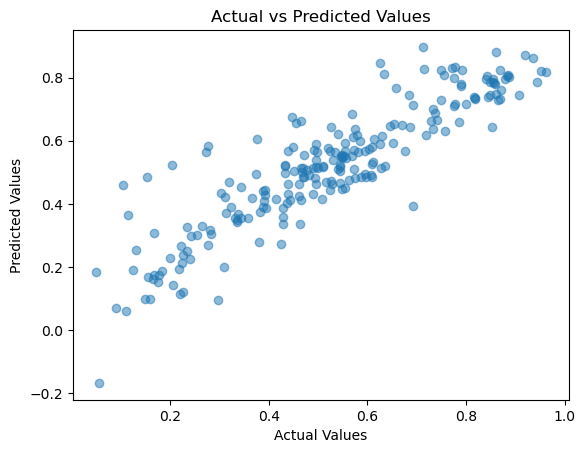

In [155]:
# Plot actual vs predicted
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [156]:
# Calculate residuals for test data
res = y_test - y_test_pred

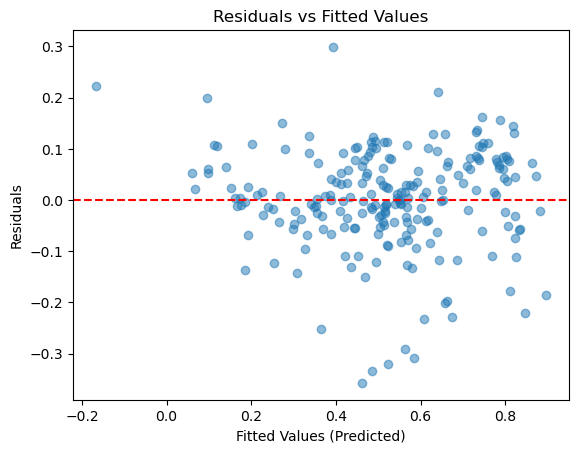

In [157]:
# Plot residuals vs fitted values (predicted values)
plt.scatter(y_test_pred, res, alpha=0.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()

In [158]:
# Evaluate model
r2_test = r2_score(y_test, y_test_pred)
print(f"R² Test Score: {r2_test}")

R² Test Score: 0.7966782546864855


In [159]:
# Predict on the training data
y_train_pred = model.predict(x_train_sm)

In [160]:
# Calculate R-squared score
r2_train = r2_score(y_train, y_train_pred)

print(f'R-squared score on training data: {r2_train}')

R-squared score on training data: 0.828673346980322
